**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [26]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.Y = np.array(y).astype(int)
        if self.algorithm == 'brute':
            self.train_x = np.array(X).astype(float)
        else:
            self.tree = neighbors.KDTree(np.array(X))
        self.classes = len(np.unique(self.Y))

    def __nearest_neighbors(self, X):
        array = np.zeros((X.shape[0], self.classes))
        k = 0
        for i in X:
            copy_test = np.copy(self.train_x)
            copy_test = [np.linalg.norm(l-i) for l in copy_test]
            a = np.argpartition(copy_test, self.n_neighbors)[:self.n_neighbors]
            for j in a:
                b = self.Y[j]
                array[k][b] += 1
            k += 1
        return array

    def predict_brute(self, X):
        self.nn = self.__nearest_neighbors(X)
        answer = [np.argmax(i) for i in
                  self.nn]
        return np.array(answer)

    def predict_tree(self, X):
        array = np.array([])
        (distance, indexes) = self.tree.query(X, k=self.n_neighbors)
        for i in self.Y[indexes]:
            array = np.append(array,
                              np.bincount(i).argmax())
        return array.astype(int)

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.predict_brute(X)
        if self.algorithm == 'kd_tree':
            return self.predict_tree(X)

    def predict_proba_brute(self, X):
        array = np.divide(self.nn,
                          self.n_neighbors)
        return array

    def predict_proba_tree(self, X):
        array = np.array([])
        (distance, indexes) = self.tree.query(X, k=self.n_neighbors)
        for i in self.Y[indexes]:
            now = np.array([])
            for j in range(self.classes):
                now = np.append(now, np.count_nonzero(i == j))
            array = np.append(array, now)
        return np.divide(array, self.n_neighbors)

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return self.predict_proba_brute(X)
        if self.algorithm == 'kd_tree':
            return self.predict_proba_tree(X)

    def score(self, X, y):
        array = np.subtract(self.predict(X), y)
        s = np.count_nonzero(array)
        return 1 - s / y.shape[0]

**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [9]:
%time clf.predict(X_test)

Wall time: 15.6 ms


array([0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2])

In [10]:
%time my_clf.predict(X_test)

Wall time: 62.5 ms


array([0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2], dtype=int64)

In [11]:
%time clf.predict_proba(X_test)

Wall time: 15.6 ms


array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [12]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [13]:
clf.score(X_test, y_test)

0.9333333333333333

In [14]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [15]:
import pandas as pd

2


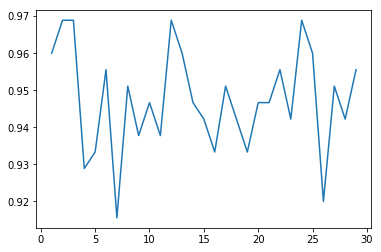

In [19]:
score = []
neighbors = []
best_neighbors = 0
best_score = 0
for i in range (1, 30):
    neighbors.append(i)
    sum_score = 0
    for j in range (15):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                            iris.target, 
                                                            test_size=0.1, 
                                                            stratify=iris.target)
        clf.fit(X_train, y_train)
        sum_score += clf.score(X_test, y_test)
    score.append(sum_score/15)
    if (sum_score > best_score):
        best_score = sum_score
        best_neighbors = i
print(best_neighbors)
plt.plot(neighbors, score)

**MNIST**

In [20]:
from mlxtend.data import loadlocal_mnist

In [4]:
X, y = loadlocal_mnist(
        images_path='/mnist/train-images.idx3-ubyte',
        labels_path='/mnist/train-labels.idx1-ubyte')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)

In [9]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [10]:
%time clf.fit(X_train, y_train)

Wall time: 1min 27s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [12]:
%time my_clf.fit(X_train, y_train)

Wall time: 406 ms


In [13]:
%time clf.predict(X_test)

Wall time: 1min 17s


array([9, 3, 6, 9, 3, 7, 0, 7, 6, 5, 1, 3, 6, 7, 7, 0, 8, 3, 3, 5, 9, 7,
       9, 4, 1, 3, 4, 6, 1, 8, 2, 8, 1, 0, 9, 2, 6, 4, 2, 4, 5, 1, 1, 9,
       4, 9, 2, 6, 8, 8, 1, 3, 1, 3, 1, 0, 5, 0, 3, 2, 4, 0, 7, 9, 2, 6,
       9, 1, 0, 7, 7, 5, 2, 1, 5, 9, 7, 6, 4, 3, 6, 7, 0, 6, 9, 7, 4, 6,
       7, 2, 7, 2, 7, 6, 6, 1, 6, 2, 8, 3, 9, 6, 5, 2, 6, 8, 3, 0, 4, 2,
       5, 7, 1, 3, 9, 2, 8, 9, 5, 6, 8, 7, 7, 3, 1, 3, 6, 3, 2, 0, 6, 4,
       5, 6, 4, 8, 8, 7, 3, 5, 4, 2, 1, 0, 9, 4, 7, 1, 7, 5, 7, 9, 0, 7,
       6, 3, 2, 9, 4, 9, 3, 7, 1, 6, 9, 5, 1, 2, 6, 3, 0, 3, 6, 9, 5, 5,
       6, 8, 8, 7, 1, 1, 2, 3, 3, 8, 0, 9, 2, 2, 1, 2, 0, 1, 6, 9, 4, 5,
       8, 4, 4, 1, 0, 8, 7, 6, 5, 2, 1, 3, 8, 4, 2, 2, 6, 9, 4, 3, 1, 9,
       0, 1, 5, 0, 9, 2, 7, 4, 6, 7, 2, 9, 0, 7, 4, 8, 9, 4, 3, 5, 5, 5,
       9, 7, 0, 0, 8, 4, 4, 7, 7, 3, 9, 7, 3, 4, 1, 1, 1, 1, 5, 6, 6, 1,
       3, 4, 3, 0, 4, 1, 1, 7, 3, 1, 8, 9, 6, 3, 3, 4, 9, 5, 0, 9, 4, 0,
       1, 0, 2, 4, 5, 4, 4, 0, 2, 5, 1, 7, 0, 1, 8,

In [14]:
%time my_clf.predict(X_test)

Wall time: 22min 56s


array([9, 3, 6, 9, 3, 7, 0, 7, 6, 5, 1, 3, 6, 7, 7, 0, 8, 3, 3, 5, 9, 7,
       9, 4, 1, 3, 4, 6, 1, 8, 2, 8, 1, 0, 9, 2, 6, 4, 2, 4, 5, 1, 1, 9,
       4, 9, 2, 6, 8, 8, 1, 3, 1, 3, 1, 0, 5, 0, 3, 2, 4, 0, 7, 9, 2, 6,
       9, 1, 0, 7, 7, 5, 2, 1, 5, 9, 7, 6, 4, 3, 6, 7, 0, 6, 9, 7, 4, 6,
       7, 2, 7, 2, 7, 6, 6, 1, 6, 2, 8, 3, 9, 6, 5, 2, 6, 8, 3, 0, 4, 2,
       5, 7, 1, 3, 9, 2, 8, 9, 5, 6, 8, 7, 7, 3, 1, 3, 6, 3, 2, 0, 6, 4,
       5, 6, 4, 8, 8, 7, 3, 5, 4, 2, 1, 0, 9, 4, 7, 1, 7, 5, 7, 9, 0, 7,
       6, 3, 2, 9, 4, 9, 3, 7, 1, 6, 9, 5, 1, 2, 6, 3, 0, 3, 6, 9, 5, 5,
       6, 8, 8, 7, 1, 1, 2, 3, 3, 8, 0, 9, 2, 2, 1, 2, 0, 1, 6, 9, 4, 5,
       8, 4, 4, 1, 0, 8, 7, 6, 5, 2, 1, 3, 8, 4, 2, 2, 6, 9, 4, 3, 1, 9,
       0, 1, 5, 0, 9, 2, 7, 4, 6, 7, 2, 9, 0, 7, 4, 8, 9, 4, 3, 5, 5, 5,
       9, 7, 0, 0, 8, 4, 4, 7, 7, 3, 9, 7, 3, 4, 1, 1, 1, 1, 5, 6, 6, 1,
       3, 4, 3, 0, 4, 1, 1, 7, 3, 1, 8, 9, 6, 3, 3, 4, 9, 5, 0, 9, 4, 0,
       1, 0, 2, 4, 5, 4, 4, 0, 2, 5, 1, 7, 0, 1, 8,

In [15]:
%time clf.predict_proba(X_test)

Wall time: 1min 17s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [16]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [17]:
clf.score(X_test, y_test)

0.9516666666666667

In [18]:
my_clf.score(X_test, y_test)

0.9516666666666667

Задание 4

In [21]:
clf = KNeighborsClassifier(n_neighbors=best_neighbors, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=best_neighbors, algorithm='kd_tree')

In [22]:
X_train, y_train = loadlocal_mnist(
        images_path='/mnist/train-images.idx3-ubyte',
        labels_path='/mnist/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(
        images_path='/mnist/t10k-images.idx3-ubyte',
        labels_path='/mnist/t10k-labels.idx1-ubyte')

In [23]:
%time clf.fit(X_train, y_train)

Wall time: 1min 20s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [28]:
%time my_clf.fit(X_train, y_train)

Wall time: 1min 26s


In [29]:
%time clf.predict(X_test)

Wall time: 22min 14s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [30]:
%time my_clf.predict(X_test)

Wall time: 22min 17s


array([7, 2, 1, ..., 4, 5, 6])

In [31]:
%time clf.predict_proba(X_test)

Wall time: 22min 7s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
%time my_clf.predict_proba(X_test)

Wall time: 22min 14s


array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
clf.score(X_test, y_test)

0.9627

In [34]:
my_clf.score(X_test, y_test)

0.9627

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных, основанная на matplotlib (для быстрого построения графиков)

# matplotlib - библиотека для визуализации данных двумерной графикой

# train_test_split - случайно разделяет данные в необходимой пропрорции на тестовую и обучающую выборки 

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - Позволяет последовательно выполнять 
# список действий над данными.

# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс, стандартизирующий фичи (среднее
# значение - 0, стандартное отклонение - 1)

# ClassifierMixin - Mixin класс для всех классификаторов в Scikit-Learn. Содержит в себе метод 
# score - показывающий среднее значение точности на выборке.

# NeighborsBase - базовый класс sklearn для оценок ближайших соседей

# KNeighborsMixin - класс из sklearn для поиска k-соседей

# SupervisedIntegerMixin - класс, который предоставляет метод fit с параметрами X и y, 
# который обучает модель используя Х как данные у как значения.